<h1 style=" text-align: center; font-size: 30px;"><b>Statistical Measures<br>Machine Learning Assignment I</b></h1>

<h1 style=" text-align: center; font-size: 20px;"> Bangalore House Price Dataset Analysis</b></h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### <font color='blue'> You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:</font>

## Q1. Perform basic EDA (Score:1)

In [2]:
df=pd.read_csv("house_price.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.shape

(13200, 7)

In [8]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [12]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [14]:
df['location'].value_counts()

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

#### <font color='green'>Finding and Removing duplicates</font>.

In [17]:
df.duplicated().sum()

1049

In [19]:
dfc=df.copy()

In [21]:
dfc.drop_duplicates(inplace=True)

In [23]:
dfc.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13194    False
13195    False
13196    False
13197    False
13198    False
Length: 12151, dtype: bool

In [25]:
dfc.duplicated().sum()

0

In [27]:
dfc.shape

(12151, 7)

<font color='green'>Removed duplicates</font>.

### Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
 a) Mean and Standard deviation<br>
 b)Percentile method<br>
 c) IQR(Inter quartile range method)<br>
 d) Z Score method<br>


### <font color='green'> a) Mean and Standard deviation</font>

In [29]:
df1=dfc

In [31]:
mean=df1['price_per_sqft'].mean()
std=df1['price_per_sqft'].std()
print(f"mean:{mean}\n std : {std}")

mean:8132.641840177763
 std : 111232.9008957087


In [33]:
# let the threshold multiplier= 3
threshold=3

In [35]:
#Calculating the upper and lower limit
low_lim=mean-std*threshold
up_lim=mean+threshold*std
print(f"Lower Limit: {low_lim}, Upper Limit: {up_lim}")

Lower Limit: -325566.06084694836, Upper Limit: 341831.3445273039


In [37]:
#Detecting the outliers
outliers=df1[(df1['price_per_sqft']<low_lim) | (df1['price_per_sqft']>up_lim)]
print(f"outliers : {outliers}")

outliers :              location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


In [39]:
print(f"Length of outliers : {len(outliers)}")

Length of outliers : 5


In [41]:
#Trimming method for removing outliers
df1_cleaned=dfc[(df1['price_per_sqft']>low_lim) & (df1['price_per_sqft']<up_lim)]
print(f"Dataset after trimming: {df1_cleaned.shape}")

Dataset after trimming: (12146, 7)


### <font color='green'> b)Percentile method </font>

In [43]:
df2=dfc

In [45]:
#Assume the percentile thresholds
lower_threshold= 0.05
upper_threshold=0.95
# Calculate the threshold values
low_lim = df2['price_per_sqft'].quantile(lower_threshold)
up_lim = df2['price_per_sqft'].quantile(upper_threshold)
print(f"Lower Limit (5th Percentile): {low_lim}, Upper Limit (95th Percentile): {up_lim}")

Lower Limit (5th Percentile): 3150.0, Upper Limit (95th Percentile): 15600.0


In [47]:
# Detect outliers
outliers = df2[(df2['price_per_sqft'] < low_lim) | (df2['price_per_sqft'] > up_lim)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 1211


In [49]:
#Imputation method
# Replace outliers with the median
median = df2['price_per_sqft'].median()
df2['price_per_sqft'] = df2['price_per_sqft'].apply(
    lambda x: median if x < low_lim or x > up_lim else x
)

In [51]:
df2.shape

(12151, 7)

In [53]:
# Verify no outliers remain
print(df2[(df2['price_per_sqft'] < low_lim) | (df2['price_per_sqft'] > up_lim)])

Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft]
Index: []


<font color ='green'>Its verified that there is no outliers after percentile method</font>

### <font color='green'>c) IQR(Inter quartile range method)</font>

In [55]:
df3=dfc

In [57]:
df3.shape

(12151, 7)

In [59]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1=df3['price_per_sqft'].quantile(0.25)
q3=df3['price_per_sqft'].quantile(0.75)
iqr=q3-q1
lower_lim=q1-iqr*1.5
upper_lim=q3+iqr*1.5

print(f"Lower Limit: {lower_lim}, Upper Limit: {upper_lim}")

Lower Limit: 1018.5, Upper Limit: 10422.5


In [61]:
#Detecting outliers
outliers = df3[(df3['price_per_sqft'] < lower_lim) | (df3['price_per_sqft'] > upper_lim)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 963


In [63]:
#Using capping method for outlier removal
# Cap the outliers
df3['price_per_sqft'] = df3['price_per_sqft'].apply(
    lambda x: lower_lim if x < lower_lim else (upper_lim if x > upper_lim else x)
)

In [65]:
#Detecting outliers
outliers = df3[(df3['price_per_sqft'] < lower_lim) | (df3['price_per_sqft'] > upper_lim)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 0


 <font color='green'> All out liers are removed by IQR method</font>

### <font color='green'>d) Z Score method</font>

In [111]:
df4=dfc

In [113]:
df4.shape

(12151, 8)

In [115]:
from scipy.stats import zscore
#calculting the zscore
df4['z_score']=zscore(df4['price_per_sqft'])
#An observation is an outlier if  |Z|>3.
#Filtering outliers
df4_cleaned = df4[abs(df4['z_score']) <= 3 ]

In [117]:
df4_cleaned.size

97208

In [119]:
# Identify outliers
outliers = df4_cleaned[(df4_cleaned['z_score'] > 3) | (df4_cleaned['z_score'] < -3)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 0


In [121]:
df4_cleaned.drop(columns=['z_score'], inplace=True)  # Remove the Z-score column

<font color='green'>Outliers are removed using Z_score method also.</font>

### Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? (Score:1)

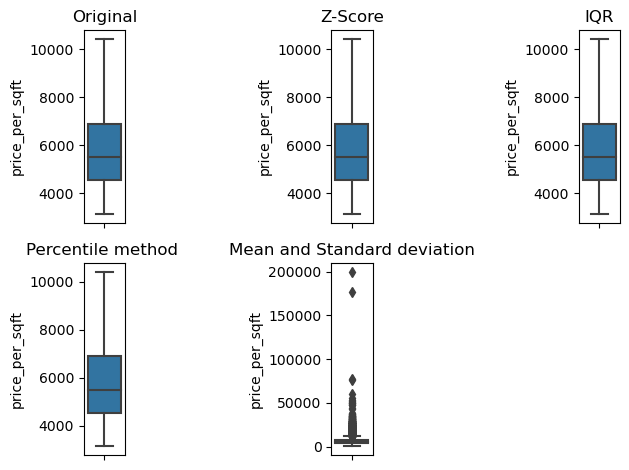

In [79]:
datasets = {
    'Original': dfc['price_per_sqft'],
    'Z-Score': df4_cleaned['price_per_sqft'],
    'IQR': df3['price_per_sqft'],
    'Percentile method ': df2['price_per_sqft'],
    'Mean and Standard deviation': df1_cleaned['price_per_sqft']
}
for i, (label, data) in enumerate(datasets.items(), 1):
    plt.subplot(2,3, i)
    sns.boxplot(y=data)
    plt.title(label)

plt.tight_layout()
plt.subplots_adjust(wspace=5)
plt.show()


### <font color='green'> Observations
#### The best method depends on our goal:<br>
* If we aim to strictly remove outliers and ensure a balanced dataset, the IQR method or Z-Score method appears to work best based on these plots.<b
* If we aim to  retain more data points while still handling outliers, the Percentile method is a reasonable choice.
* Mean and Standard Deviation method appears to have retained a broader range of values, with many potential outliers still present. It seems less effective in cleaning the data, as the range is far larger compared to the other methods.
* Percentile Method method seems to retain more data compared to the Z-Score or IQR methods. However, a few higher values might still be considered borderline outliers.

### Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

In [142]:
dfc=df.copy()

In [81]:
from scipy.stats import skew, kurtosis

In [144]:
dfc.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


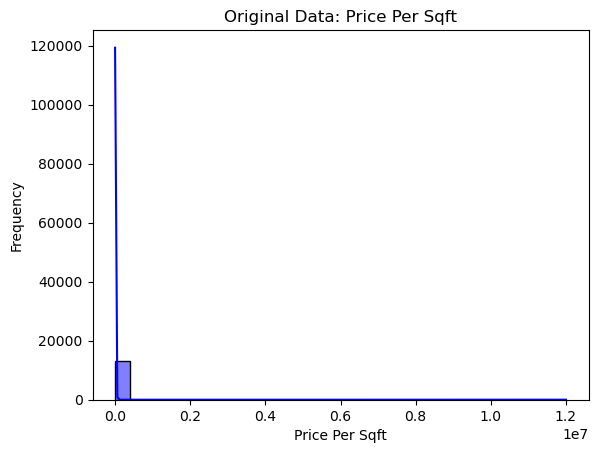

In [146]:
sns.histplot(dfc['price_per_sqft'],kde=True, bins=30, color='blue')
plt.title('Original Data: Price Per Sqft')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

In [148]:
# Calculate skewness and kurtosis
original_skewness=skew(dfc['price_per_sqft'])
original_kurtosis = kurtosis(dfc['price_per_sqft'])
print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")

Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382


##### <font color='green'> An extremely high positive skewness, indicating that the distribution is heavily right-skewed
##### <font color='green'> A right-skewed distribution means that there are a significant number of data points with very high values (outliers on the right side of the plot).
##### <font color='green'>Extremely high kurtosis indicates very heavy tails or outliers. 

### Since the data is heavily skewed and shows high kurtosis, it is critical to apply transformations to normalize it. Let us focus on log transformation and square root transformation first, as these are common methods to reduce positive skewness and kurtosis.

In [150]:
# Log Transformation
dfc['log_price_per_sqft'] = np.log1p(dfc['price_per_sqft'])

# Square Root Transformation
dfc['sqrt_price_per_sqft'] = np.sqrt(df4['price_per_sqft'])

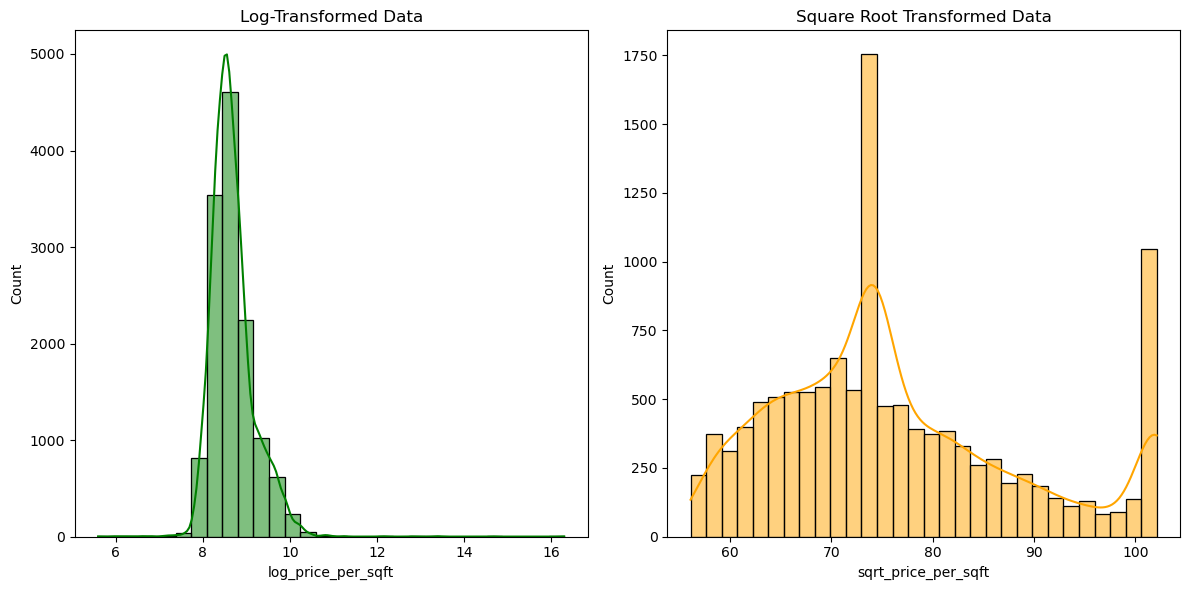

In [152]:
# Plot histograms for transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(dfc['log_price_per_sqft'], kde=True, bins=30, ax=axes[0], color='green')
axes[0].set_title('Log-Transformed Data')
sns.histplot(dfc['sqrt_price_per_sqft'], kde=True, bins=30, ax=axes[1], color='orange')
axes[1].set_title('Square Root Transformed Data')
plt.tight_layout()
plt.show()

In [154]:
# Recalculate skewness and kurtosis for transformed data
logged_skewness=skew(dfc['log_price_per_sqft'])
logged_kurtosis = kurtosis(dfc['log_price_per_sqft'])
sqrt_skewness = skew(dfc['sqrt_price_per_sqft'])
sqrt_kurtosis = kurtosis(dfc['sqrt_price_per_sqft'])
print(f"Log Transformation - Skewness: {logged_skewness}, Kurtosis: {logged_kurtosis}")
print(f"Square Root Transformation - Skewness: {sqrt_skewness}, Kurtosis: {sqrt_kurtosis}")

Log Transformation - Skewness: 1.4003259019533636, Kurtosis: 9.203000543610957
Square Root Transformation - Skewness: nan, Kurtosis: nan


#### Log Transformation:
* Skewness: 1.4009<br>
Reduced significantly from the original skewness (103.88), but still moderately skewed.
* Kurtosis: 9.4044<br>
Reduced significantly from the original kurtosis (11131.23), but still higher than the kurtosis for normal distribution (3).

#### Square Root Transformation:
* Skewness: 0.5908<br>
Much closer to normal distribution range (around 0, but positive).
Indicates a mild right skew.
* Kurtosis: -0.4128<br>
A negative kurtosis suggests reduced tail weight and brings the distribution closer to normality.

#### <font color='green'>Conclusion: More better is Square Root Transformation method as it seems to bring the skewness and kurtosis much closer to a normal distribution, especially in terms of kurtosis.

### Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)

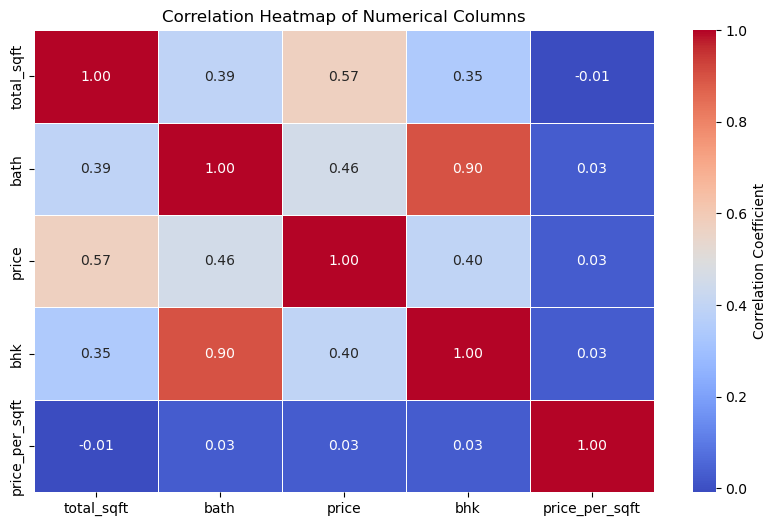

In [156]:
dfc.drop(columns=['log_price_per_sqft','sqrt_price_per_sqft'], inplace=True)  # Remove the columns "log_price_per_sqft" and "sqrt_price_per_sqft" .
# Select numerical columns
numerical_columns = dfc.select_dtypes(include=['float64', 'int64']).columns
# Compute correlation matrix
correlation_matrix = dfc[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

#### <font color='green'> Bath and BHK shows high correlation 

### Q6. Draw Scatter plot between the variables to check the correlation between them. (Score:1)

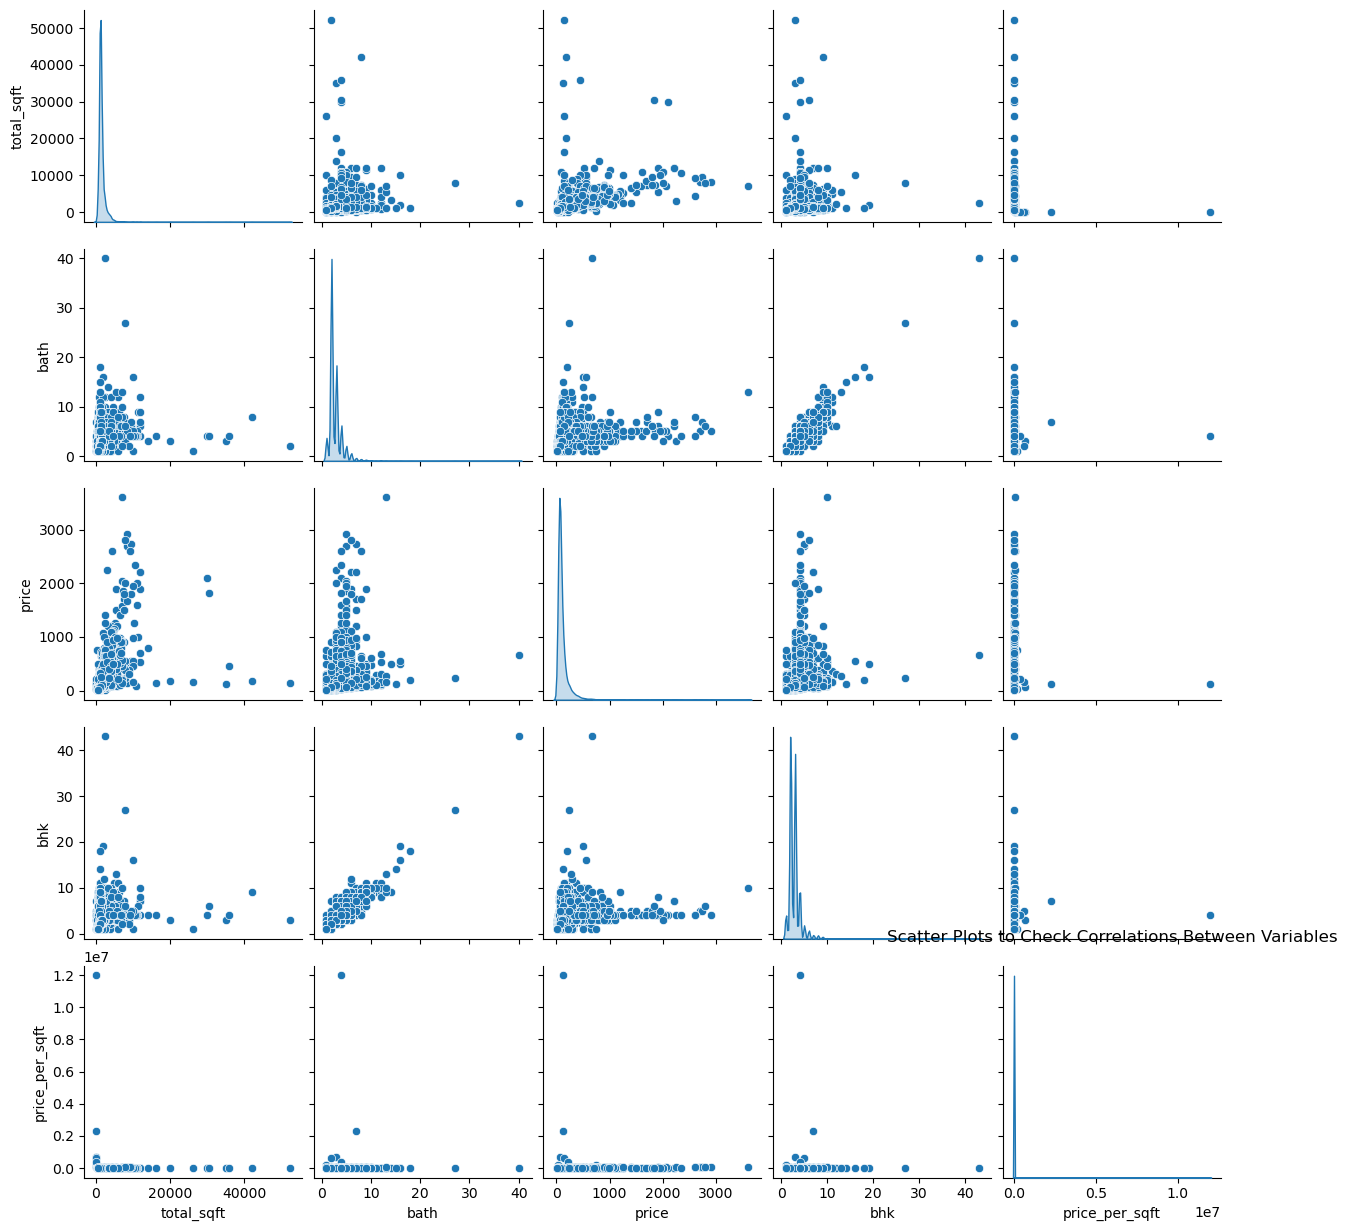

In [158]:
# Generate scatter plots for pairwise numerical columns
# Suppress warnings
warnings.filterwarnings('ignore')
sns.pairplot(dfc[numerical_columns], diag_kind='kde')
plt.title('Scatter Plots to Check Correlations Between Variables')
plt.show()

### Scatterplot for each combination of columns

In [160]:
dfc.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

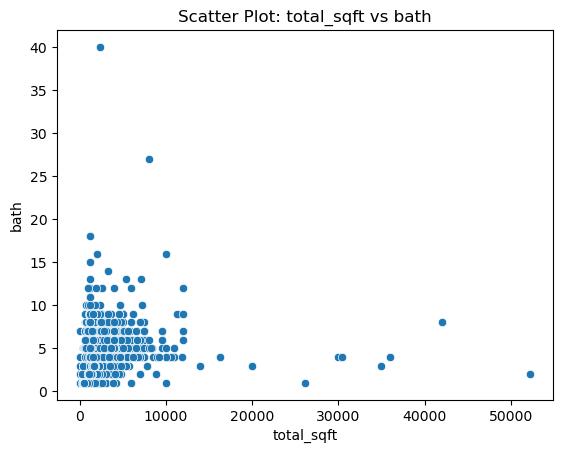

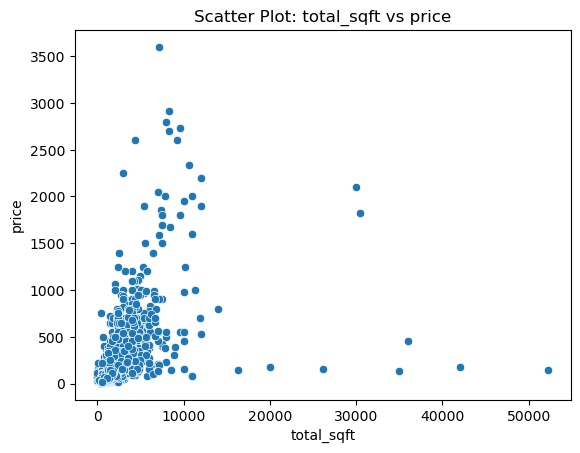

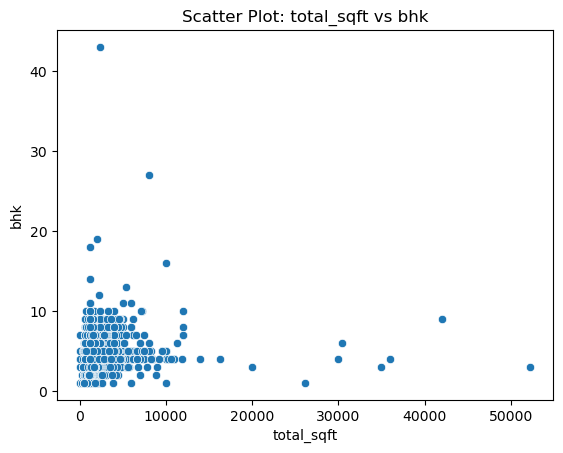

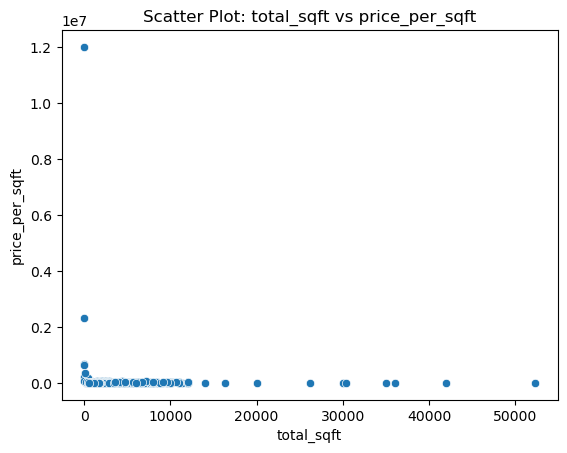

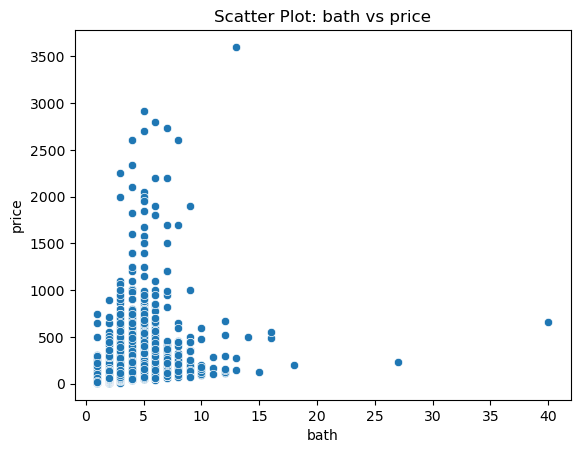

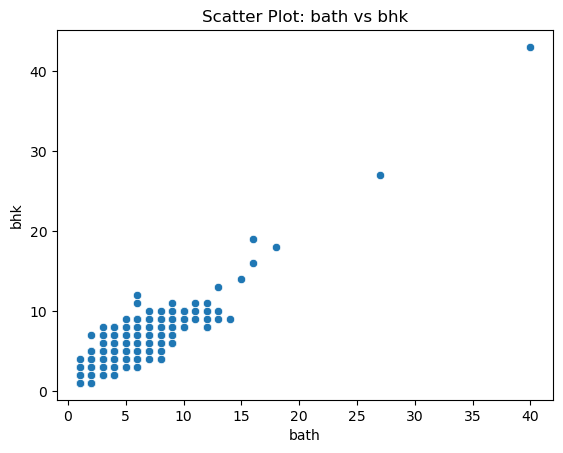

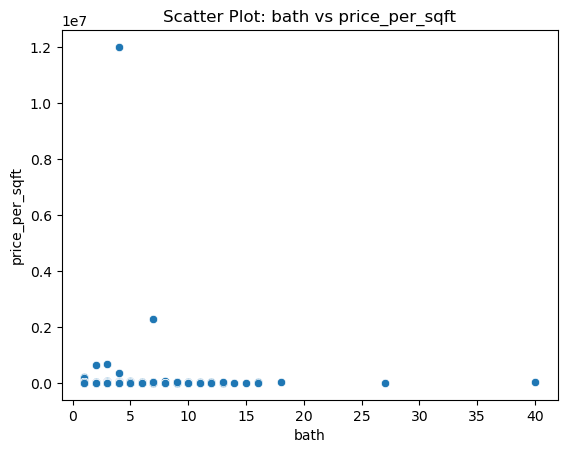

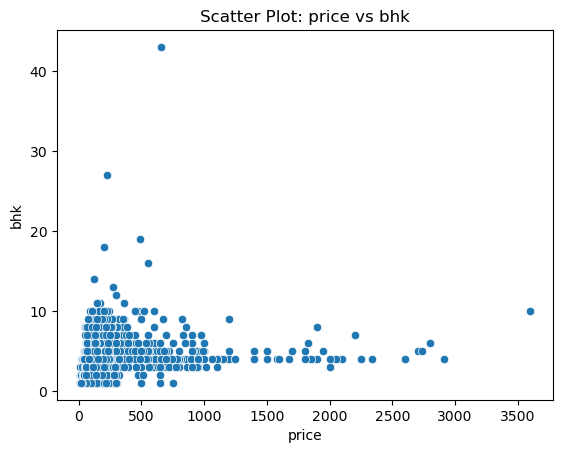

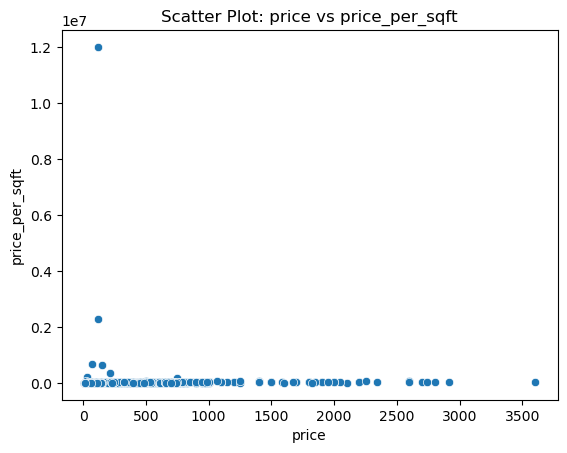

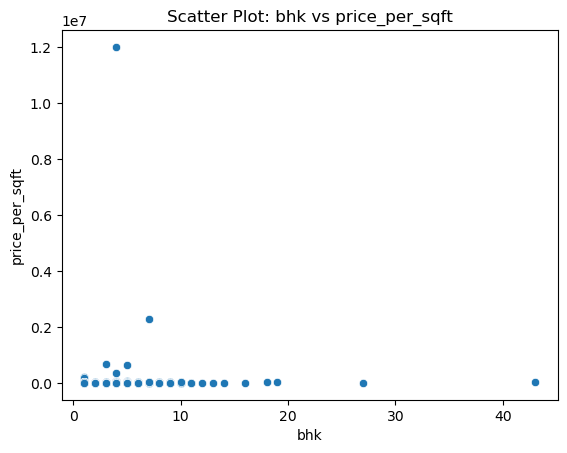

In [162]:
from itertools import combinations
# dfc is DataFrame and numerical_columns contains the names of numerical columns
for col1, col2 in combinations(numerical_columns, 2):
    sns.scatterplot(x=dfc[col1], y=dfc[col2])
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

### Scatter plot is analysed for correlation between each columns